In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Mikko\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

How to calculate the chance of getting a positive result from at test?

$$ Pr(vampire \mid positive) =  \frac{Pr(vampire) Pr(positive \mid vampire)}{Pr(not vampire)Pr(positive \mid not vampire) + Pr(vampire) Pr(positive \mid vampire)}   $$

$$ Pr(vampire \mid positive) = \frac{Pr(vampire)Pr(positive \mid vampire)}{Pr(positive)} $$

$$ Pr(positive) = Pr(vampire) Pr(positive \mid vampire) + (1-Pr(vampire))Pr(positive \mid notvampire) $$

In [3]:
PrPv = 0.95
PrPm = 0.01
PrV = 0.001

In [4]:
PrVp = PrV*PrPv/((1-PrV)*PrPm + PrV*PrPv)
PrVp

0.08683729433272395

How to use the grid approximation to calculate the posterior propability distribution for a binomial test?

In [182]:
grid_points = 1000
w=8
n=15

In [183]:
prior_grid = np.repeat(0.5,grid_points)

bins = np.linspace(0,1,grid_points)
test_grid = stats.binom.pmf(w,n,bins)

In [184]:
posterior_grid = test_grid*prior_grid/(test_grid*prior_grid).sum()

In [185]:
samples = np.random.choice(bins, p=posterior_grid, size=int(1e4),replace= True)

Text(0, 0.5, 'density')

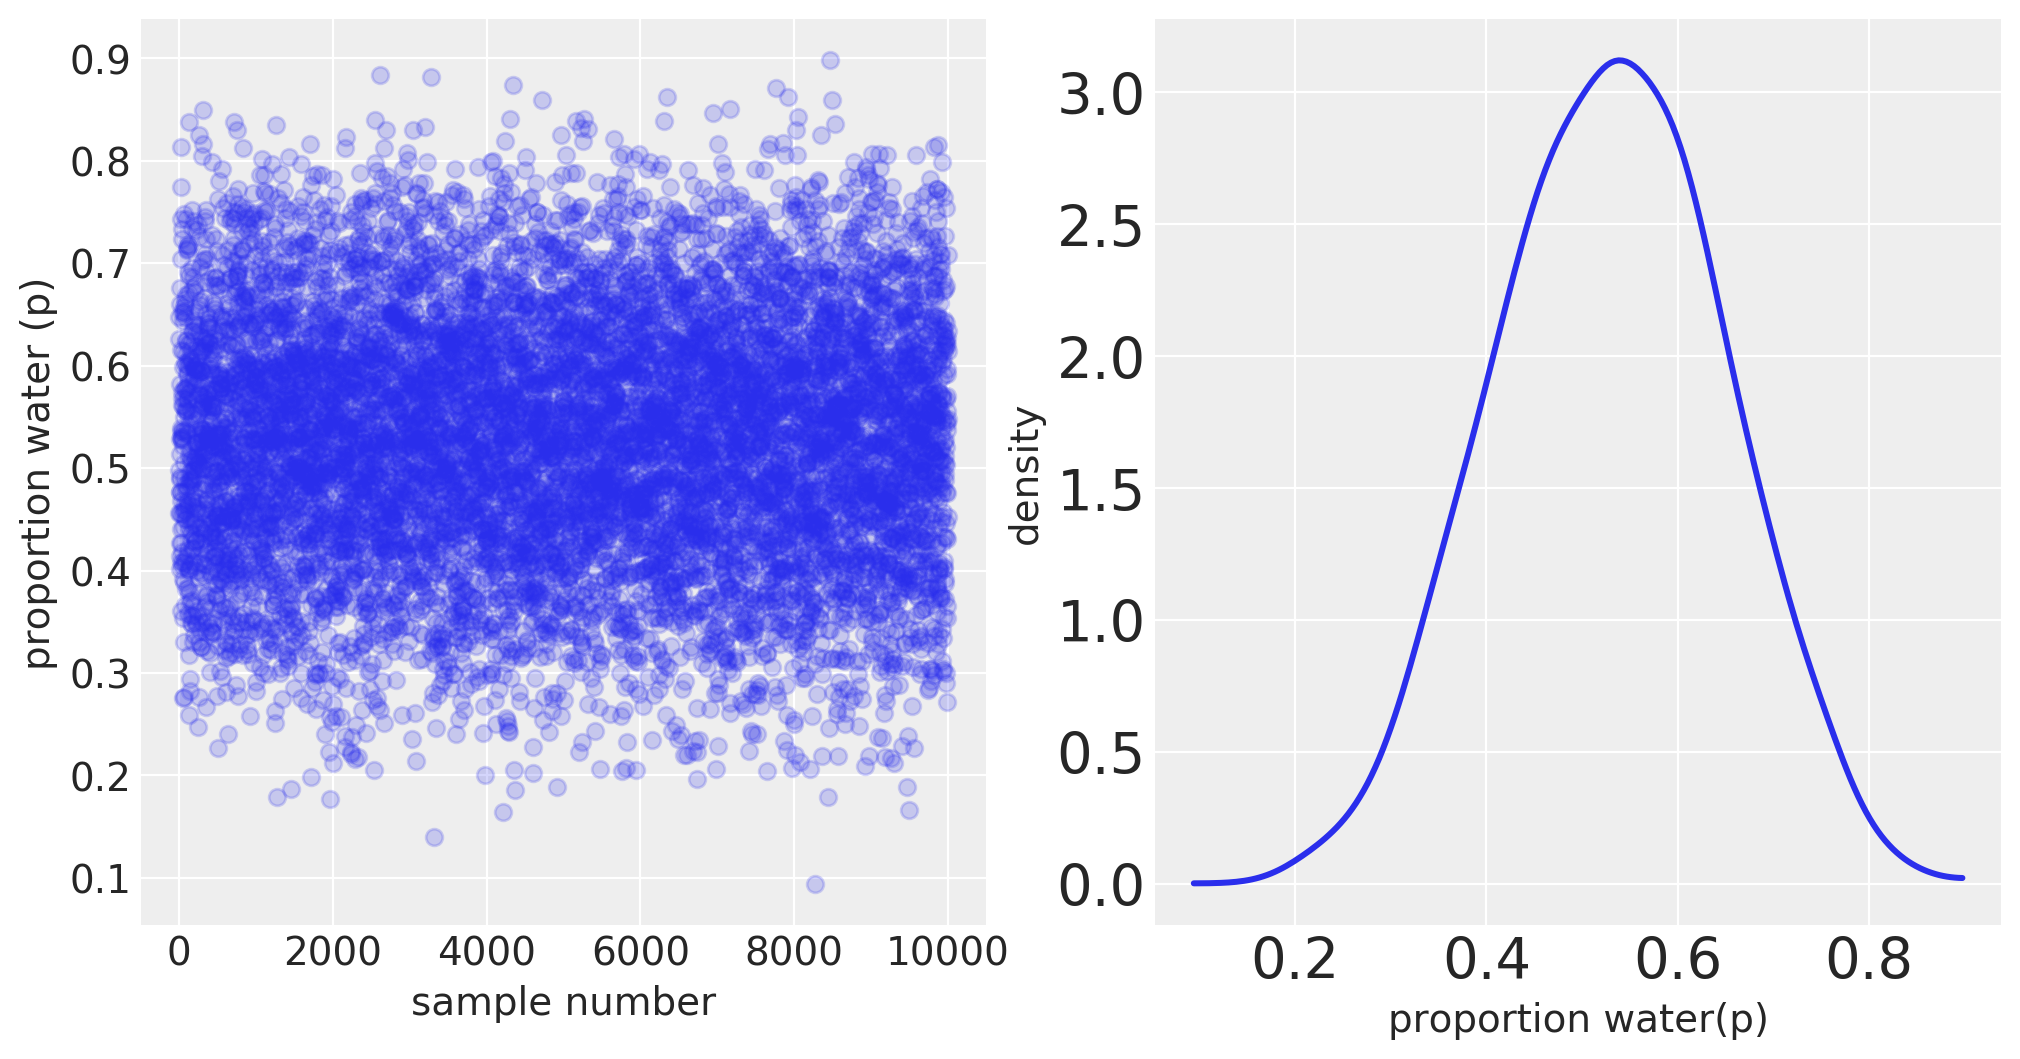

In [186]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha = 0.2)
ax0.set_xlabel('sample number', fontsize= 14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel('proportion water(p)', fontsize = 14)
ax1.set_ylabel('density', fontsize = 14)

In [370]:
samples = np.random.choice(bins, p=posterior_grid, size=int(1e4),replace= True)

In [371]:
np.percentile(samples, [0.5,99.5])

array([0.24123123, 0.81181181])

In [372]:
np.percentile(samples, 50)

0.5315315315315315

In [373]:
prior_grid[0:int(grid_points/2)] = 0

In [374]:
posterior_grid = prior_grid * test_grid/(prior_grid*test_grid).sum()

In [375]:
samples = np.random.choice(bins, p=posterior_grid, size=int(1e4),replace= True)

Text(0, 0.5, 'density')

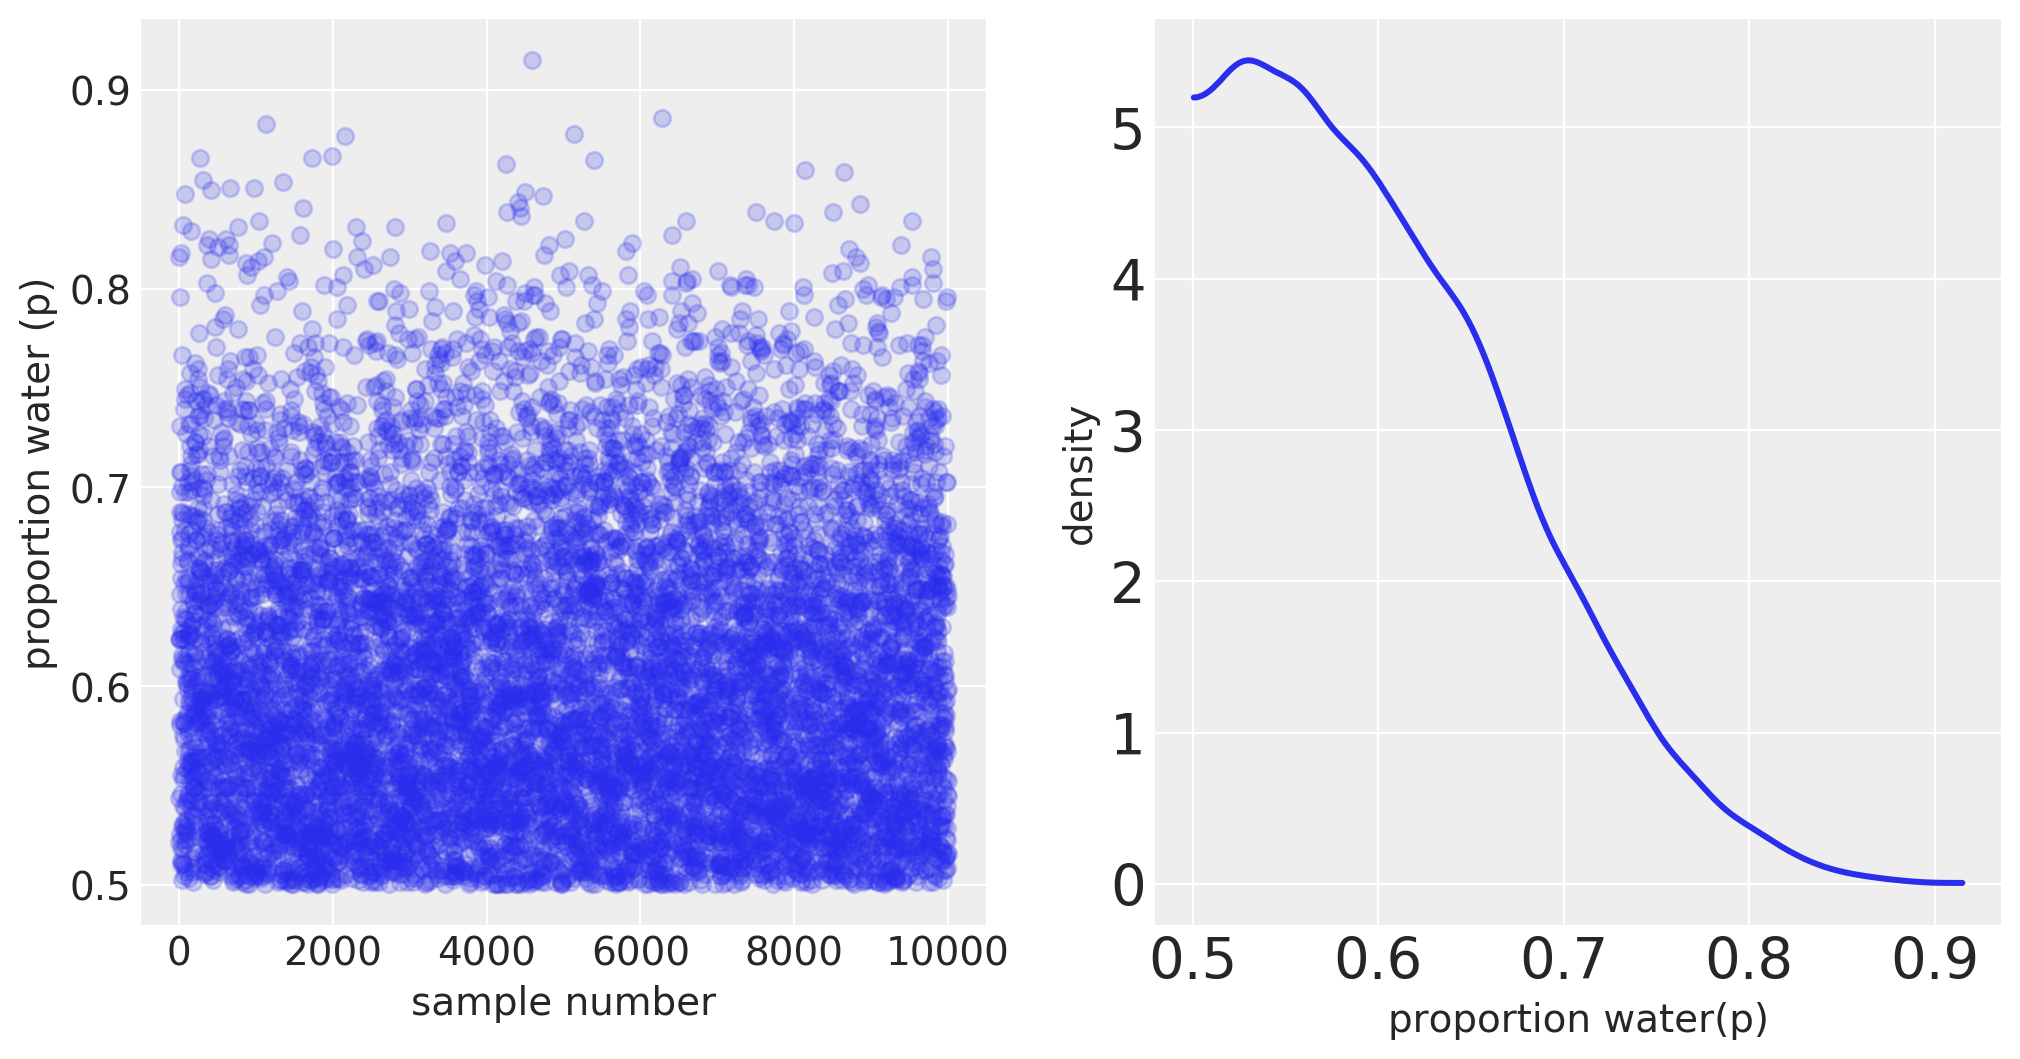

In [376]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha = 0.2)
ax0.set_xlabel('sample number', fontsize= 14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel('proportion water(p)', fontsize = 14)
ax1.set_ylabel('density', fontsize = 14)

In [171]:
np.percentile(samples,50)

0.5945945945945946

In [181]:
np.percentile(samples,[0.5,99.5])

array([0.5005005 , 0.82583083])

In [179]:
stats.binom.rvs(n=2, p = 0.5, size = 100)

array([1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0])

In [191]:
def posterior_interval_width(n,p_true):
    w = stats.binom.rvs(n, p_true)
    grid = np.linspace(0,1,n)
    binomial_test = stats.binom.pmf(w,n, grid)
    result = np.percentile(binomial_test,[0.5,99.5])
    return(result[1] - result[0])

In [192]:
posterior_interval_width(1000,0.7)

0.027247585720505188

In [269]:
def populate_list(n, p_true):
    a= np.zeros(n)
    for i in range(len(a)):
        a[i] = posterior_interval_width(n,p_true)
    return(a)
        

In [329]:
a20 = populate_list(20,0.7)
a50 = populate_list(50,0.7)
a100 = populate_list(100,0.7)
a200 = populate_list(200,0.7)
a500 = populate_list(500,0.7)
a1000 = populate_list(1000,0.7)
a2000 = populate_list(2000,0.7)

In [338]:
x_values=[20,50,100,200,500,1000,2000]

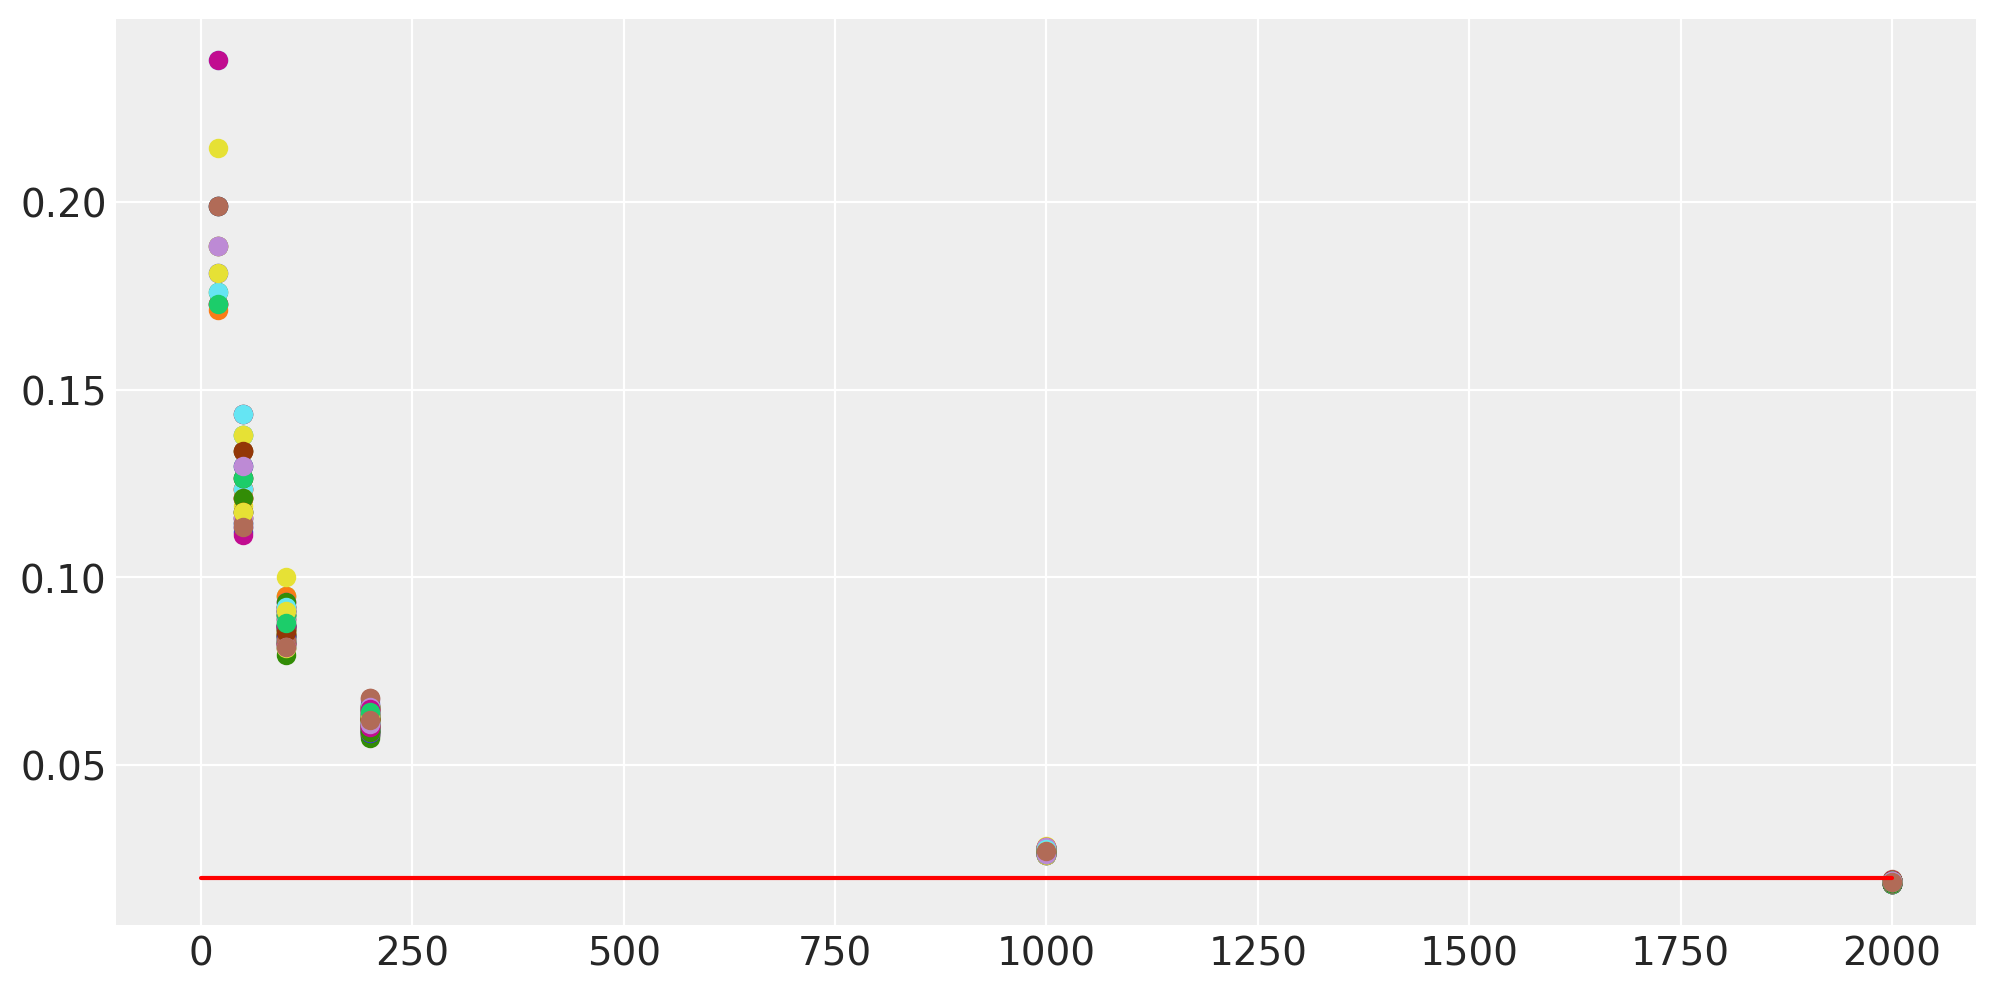

In [387]:
fig,ax1=plt.subplots(1,figsize=(12,6))
ax1.plot([20],a20.reshape(1,-1),'o')
ax1.plot([50],a50.reshape(1,-1),'o')
ax1.plot([100],a100.reshape(1,-1),'o')
ax1.plot([200],a200.reshape(1,-1),'o')
ax1.plot([1000],a1000.reshape(1,-1),'o')
ax1.plot([2000],a2000.reshape(1,-1),'o');
ax1.plot([0,2000], [0.02,0.02], color='red');